# Predicting the Stock Movement using Machine Learning

In this notebook, we are going to go through a machine learning project with the goal of predicting the stock movement of an unknown asset.

## Problem definition

> How well can we  predict stock movement based on real-market orderbook data ?

## Data

The full dataset data-training.csv can be downloaded from https://challenge.xtxmarkets.com/ under the Data Download section.

## Evaluation

The evaluation metric for this competition is the r2 score. For more information about the r2 score check: https://en.wikipedia.org/wiki/Coefficient_of_determination.

For more on the evaluation of this project check: https://github.com/correlation-one/XTXStarterKit/tree/dev/src.

## Features

The data features can be grouped into four groups: askRate, askSize, bitRate, bitSize. Each group has 14 features, for example askRate1,...,askRate14.  

## Importing libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Loading the data

In [2]:
%time df = pd.read_csv('data-training.csv')
print(df.shape)
df.head(10)

CPU times: user 27.1 s, sys: 1.57 s, total: 28.7 s
Wall time: 29.2 s
(2999999, 61)


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


## Filling missing values with 0

In [3]:
%time df = df.fillna(0)
df.head()

CPU times: user 1 s, sys: 172 ms, total: 1.18 s
Wall time: 605 ms


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


## Splitting the data into train set and test set

In [4]:
y = df.iloc[:, -1].cumsum()

def train_test_split(df, p_train = 0.667):
    N = len(df)
    y = df.y.cumsum()
    train_size = int(p_train*N)
    X_train = df.iloc[: train_size, :-1]
    y_train = y[: train_size]
    X_test = df.iloc[train_size :, :-1]
    y_test = y[train_size :]
    
    return X_train, y_train, X_test, y_test

%time X_train, y_train, X_test, y_test = train_test_split(df, 0.7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

CPU times: user 44 ms, sys: 4 ms, total: 48 ms
Wall time: 24.6 ms


((2099999, 60), (900000, 60), (2099999,), (900000,))

## Normalizing the data

In [5]:
def normalized(data):
    data -= data.mean(axis = 0)
    data /= data.std(axis = 0)
    return data
    
%time x_train_norm = normalized(X_train.copy())
print('before normalizing', y_train[:5].values)
%time y_train_norm = normalized(y_train.copy().ravel())
print('Then', y_train_norm[:5])
x_train_norm.head(10)

CPU times: user 2.44 s, sys: 2.25 s, total: 4.69 s
Wall time: 2.87 s
before normalizing [-0.5 -1.  -1.5 -2.  -2.5]
CPU times: user 56 ms, sys: 8 ms, total: 64 ms
Wall time: 38.9 ms
Then [-1.33691564 -1.33717281 -1.33742997 -1.33768714 -1.33794431]


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14
0,-0.894282,-0.872851,-0.82829,-67.989836,-66.420351,-64.694256,-63.216521,-61.834220,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
1,-0.894282,-0.872851,-0.82829,-0.803530,-66.420351,-64.694256,-63.216521,-61.834220,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
2,-0.894282,-0.872851,-0.82829,-0.803530,-0.784173,-64.694256,-63.216521,-61.834220,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
3,-0.894282,-0.872851,-0.82829,-0.803530,-0.784173,-64.694256,-63.216521,-61.834220,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
4,-0.894282,-0.872851,-0.82829,-0.803530,-0.784173,-64.694256,-63.216521,-61.834220,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
5,-0.894282,-0.872851,-0.82829,-0.803530,-0.784173,-64.694256,-63.216521,-61.834220,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
6,-0.894282,-0.872851,-0.82829,-0.803530,-0.784173,-0.743177,-63.216521,-61.834220,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
7,-0.894282,-0.872851,-0.82829,-0.803530,-0.784173,-0.743177,-0.725401,-61.834220,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
8,-0.894282,-0.872851,-0.82829,-0.803530,-0.784173,-0.743177,-0.725401,-0.708863,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
9,-0.894282,-0.872851,-0.82829,-0.803530,-0.784173,-0.743177,-0.725401,-0.708863,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651


In [6]:
%time x_test_norm = normalized(X_test.copy())
%time y_test_norm = normalized(y_test.copy().ravel())

CPU times: user 1.21 s, sys: 16 ms, total: 1.23 s
Wall time: 675 ms
CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 7.12 ms


## Building an XGBoost model

In [7]:
reg = xgb.XGBRegressor(n_estimators = 10000)
reg.fit(x_train_norm, y_train_norm,
            eval_set = [(x_train_norm, y_train_norm), (x_test_norm, y_test_norm)],
            early_stopping_rounds = 50, verbose = 2)

[0]	validation_0-rmse:0.78569	validation_1-rmse:0.78221
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[2]	validation_0-rmse:0.39282	validation_1-rmse:0.38843
[4]	validation_0-rmse:0.20560	validation_1-rmse:0.19904
[6]	validation_0-rmse:0.12163	validation_1-rmse:0.11842
[8]	validation_0-rmse:0.08884	validation_1-rmse:0.08929
[10]	validation_0-rmse:0.07712	validation_1-rmse:0.08236
[12]	validation_0-rmse:0.07253	validation_1-rmse:0.08124
[14]	validation_0-rmse:0.06999	validation_1-rmse:0.08013
[16]	validation_0-rmse:0.06837	validation_1-rmse:0.08164
[18]	validation_0-rmse:0.06663	validation_1-rmse:0.08062
[20]	validation_0-rmse:0.06533	validation_1-rmse:0.08093
[22]	validation_0-rmse:0.06435	validation_1-rmse:0.08112
[24]	validation_0-rmse:0.06313	validation_1-rmse:0.08122
[26]	validation_0-rmse:0.06246	validation_1-rmse:0.08131
[28]	validation_0-rmse:0.06168	validation_1-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Evaluation 
### Visualizing the whole data set 

In [8]:
def visual_whole_data(train, test, pred_train, pred_test, tit = None):
    whole_forecast = np.concatenate((pred_train, pred_test))
    plt.figure(figsize = (20, 6))
    plt.plot(whole_forecast, 'red', label = 'forecast')
    plt.plot(range(len(train), len(whole_forecast)), test, 'blue', label = 'test')
    plt.plot(range(len(train)), train, 'green', label = 'train')
    plt.legend(loc = 'best')
    plt.title(tit)
    plt.show()

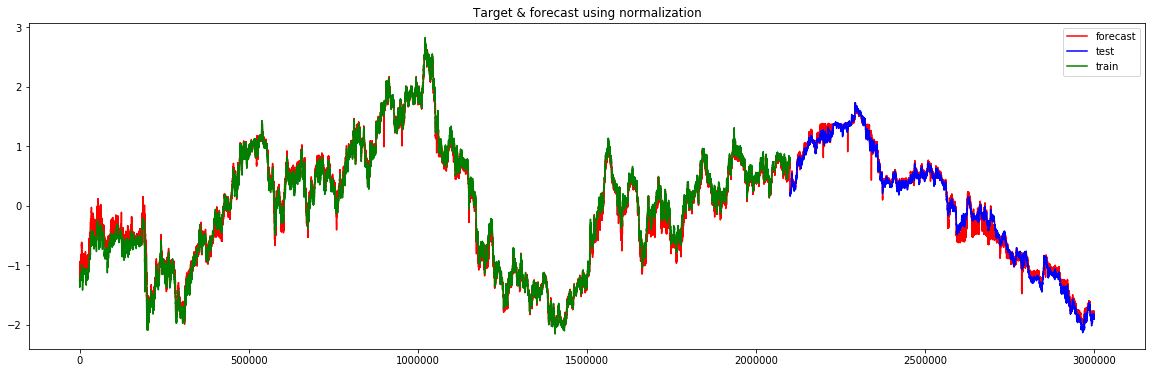

In [9]:
pred_train = reg.predict(x_train_norm)
pred_test = reg.predict(x_test_norm)    
visual_whole_data(y_train_norm, y_test_norm, pred_train,pred_test,  'Target & forecast using normalization')

### Focusing on the test set

In [10]:
def visual_test_pred_only(train, pred, test, tit = None):
    plt.figure(figsize = (20, 6))
    start = len(train)
    end = len(train) + len(test)
    plt.plot(range(start, end), pred, 'red', label = 'forecast')
    plt.plot(range(start, end), test, 'blue', label = 'test')
    plt.title(tit)
    plt.legend(loc = 'best')
    plt.show()

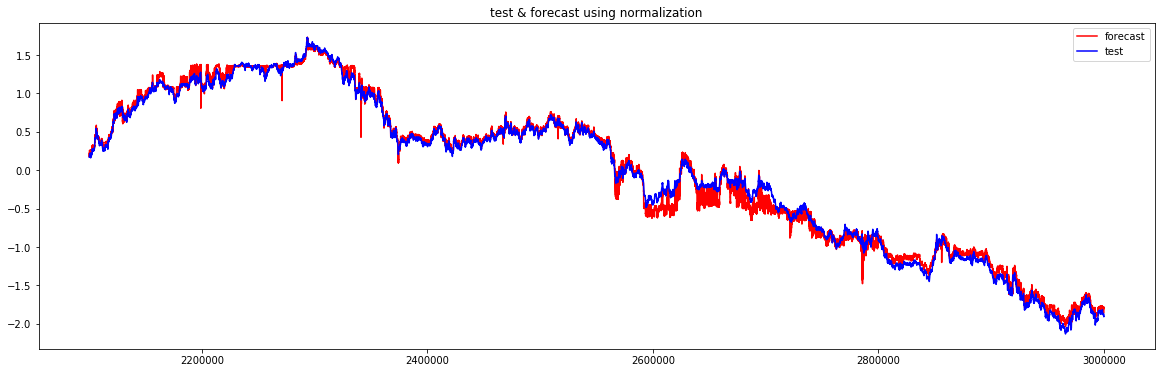

In [12]:
visual_test_pred_only(y_train_norm, pred_test, y_test_norm, 'test & forecast using normalization')

### Error Metrics On Test Set

In [13]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
        
    # Mean Error (ME)
    me = np.mean(forecast - actual)  
    
    # Mean Absolute Error (MAE)
    mae = np.mean(np.abs(forecast - actual))
        
    # Root Mean Squared Error (RMSE)
    rmse = np.mean((forecast - actual)**2)**.5 
    
    # correlation
    corr = np.corrcoef(forecast, actual)[0,1]    
        
    # Lag 1 Autocorrelation of Error (ACF1) 
    acf1 = acf(forecast - actual, fft = False)[1] 
    
    return({'me':me, 'mae': mae, 
            'rmse':rmse, 'acf1':acf1, 
            'corr':corr})

In [14]:
%time forecast_accuracy(pred_test, y_test_norm)

CPU times: user 16min, sys: 1.39 s, total: 16min 1s
Wall time: 8min 3s


{'me': 0.011412200384603626,
 'mae': 0.05949422491388163,
 'rmse': 0.08001308559354123,
 'acf1': 0.9952336036672054,
 'corr': 0.9968602236882578}